<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>Co-occurrence matrix</H1></u></center>

In [1]:
# A co-occurence matrix tell us how many times every word
# has co-occurred with the current word.

In [1]:
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [2]:
def preprocessing(text):
    words = word_tokenize(text)
    tokens = [w for w in words if w.lower() not in string.punctuation]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    # remove words less than three letters
    tokens = [word for word in tokens if len(word)>=3]
    # lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text 

In [3]:
text1 = open('../Data/carl_sagan_quote4.txt').read()
text2 = open('../Data/carl_sagan_quote2.txt').read()
list = [text1, text2]
word_list = []
for line in list:
    word_list.append(preprocessing(line))
word_list

["'ve arranged civilization crucial element profoundly depend science technology",
 'also arranged thing almost one understands science technology This prescription disaster might get away sooner later combustible mixture ignorance power going blow face']

In [4]:
count_model = CountVectorizer(ngram_range=(1,1))
docs_unigram = count_model.fit_transform(word_list)

In [5]:
# T is transpose for converting the array into matrix 
docs_unigram_matrix = (docs_unigram.T * docs_unigram)

In [6]:
docs_unigram_matrix.setdiag(0)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [8]:
df = pd.DataFrame(docs_unigram_matrix.todense(), index = count_model.get_feature_names())

In [9]:
df.columns = count_model.get_feature_names()
df

,almost,also,arranged,away,blow,civilization,combustible,crucial,depend,disaster,...,power,prescription,profoundly,science,sooner,technology,thing,this,understands,ve
almost,0,1,1,1,1,0,1,0,0,1,...,1,1,0,1,1,1,1,1,1,0
also,1,0,1,1,1,0,1,0,0,1,...,1,1,0,1,1,1,1,1,1,0
arranged,1,1,0,1,1,1,1,1,1,1,...,1,1,1,2,1,2,1,1,1,1
away,1,1,1,0,1,0,1,0,0,1,...,1,1,0,1,1,1,1,1,1,0
blow,1,1,1,1,0,0,1,0,0,1,...,1,1,0,1,1,1,1,1,1,0
civilization,0,0,1,0,0,0,0,1,1,0,...,0,0,1,1,0,1,0,0,0,1
combustible,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,1,1,1,1,1,0
crucial,0,0,1,0,0,1,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
depend,0,0,1,0,0,1,0,1,0,0,...,0,0,1,1,0,1,0,0,0,1
disaster,1,1,1,1,1,0,1,0,0,0,...,1,1,0,1,1,1,1,1,1,0


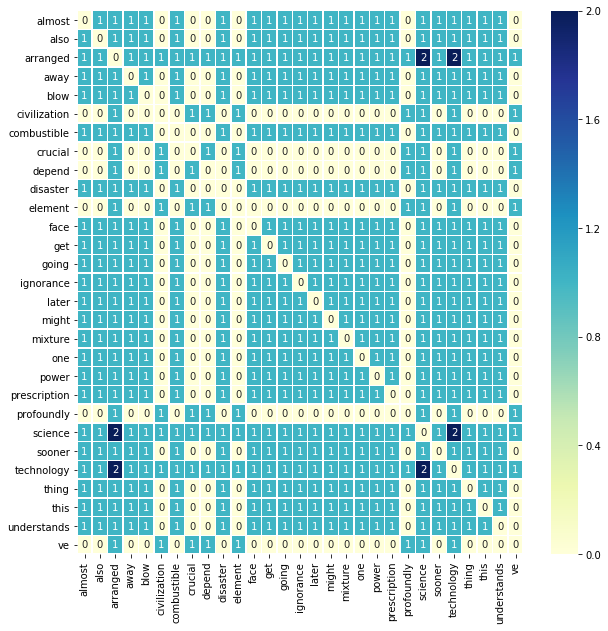

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df,annot=True,linewidths=.5, cmap="YlGnBu")

## References:

http://www.nltk.org/book/ch01.html

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html